In [ ]:
%matplotlib inline

import OnePy as op
from OnePy.builtin_module.recorders.stock_recorder import StockRecorder
from OnePy.custom_module.cleaner_sma import SMA


class SmaStrategy(op.StrategyBase):

    def __init__(self):

        super().__init__()
        self.sma1 = SMA(3, 40).calculate
        self.sma2 = SMA(5, 40).calculate

        self.sma3 = SMA(15, 40).calculate
        self.sma4 = SMA(30, 60).calculate

    def handle_bar(self):
        if self.sma1('000001') > self.sma2('000001'):
            self.buy(100, '000001', takeprofit=15,
                     stoploss=100, trailingstop_pct=0.1)
        else:
            self.sell(100, '000001')

        if self.sma3('000001') < self.sma4('000001'):
            self.short_sell(100, '000001', takeprofit=15,
                            stoploss=100, trailingstop_pct=0.1)
        else:
            self.short_cover(100, '000001')
            
# 运行MongodbReader，请先运行examples中的tushare_to_MongoDB.py
op.data_readers.MongodbReader(
    database='tushare', collection='000001', ticker='000001',
    fromdate='2017-05-25', todate='2018-03-09')

SmaStrategy()

op.RiskManagerBase()
op.StockBroker()

StockRecorder().set_setting(initial_cash=100000,
                            comm=1, comm_pct=None, margin_rate=0.1)
go = op.OnePiece()
# go.show_log(file=False)
go.sunny()
# go.output.show_setting()
# go.output.plot('000001')


+--------------------------+
| Final_Value  | $99847.06 |
| Total_return | -0.15294% |
| Max_Drawdown | 0.41400%  |
| Duration     |     361.0 |
| Sharpe_Ratio | -0.33712  |
+--------------------------+


In [2]:
go.output.show_setting()

+--------------------+
| readers_1 | 000001 |
+--------------------+
+--------------------+
| cleaners_1 | SMA_1 |
| cleaners_2 | SMA_2 |
| cleaners_3 | SMA_3 |
| cleaners_4 | SMA_4 |
+--------------------+
+--------------------------+
| strategy_1 | SmaStrategy |
+--------------------------+
+-------------------------+
| brokers_1 | StockBroker |
+-------------------------+
+-----------------------------------+
| risk_managers_1 | RiskManagerBase |
+-----------------------------------+
+-----------------------------+
| recorders_1 | StockRecorder |
+-----------------------------+


In [3]:
go.output.trade_log()

,entry_date,entry_price,entry_type,exit_date,exit_price,exit_type,pl_points,re_pnl,size,ticker
0,2017-05-25,8.947,Market Short_sell,2017-05-31,9.014728,Trailing_stop Short_cover,-0.067728,-6.772809,100,000001
1,2017-05-25,8.947,Market Buy,2017-06-02,9.097000,Limit Sell,0.150000,15.000000,100,000001
2,2017-05-26,8.967,Market Buy,2017-06-02,9.117000,Limit Sell,0.150000,15.000000,100,000001
3,2017-05-26,8.967,Market Short_sell,2017-06-02,8.997000,Market Short_cover,-0.030000,-3.000000,100,000001
4,2017-05-31,9.066,Market Short_sell,2017-06-05,8.916000,Limit Short_cover,0.150000,15.000000,100,000001
5,2017-06-01,9.046,Market Short_sell,2017-06-05,8.896000,Limit Short_cover,0.150000,15.000000,100,000001
6,2017-05-31,9.066,Market Buy,2017-06-05,8.879000,Market Sell,-0.187000,-18.700000,100,000001
7,2017-06-01,9.046,Market Buy,2017-06-06,8.888000,Market Sell,-0.158000,-15.800000,100,000001
8,2017-06-02,8.997,Market Buy,2017-06-07,8.977000,Market Sell,-0.020000,-2.000000,100,000001
9,2017-06-08,9.016,Market Buy,2017-06-13,8.987000,Market Sell,-0.029000,-2.900000,100,000001


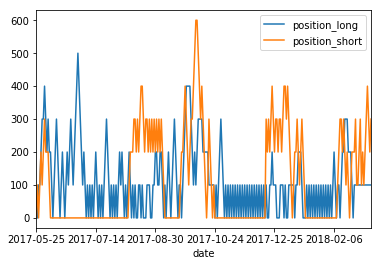

In [4]:
go.env.recorder.position.plot('000001')

In [5]:
# 一系列回测结果
go.env.recorder.cash.dataframe()
# go.env.recorder.balance
# go.env.recorder.holding_pnl
# go.env.recorder.market_value
# go.env.recorder.frozen_cash
# go.env.recorder.commission

,cash
date,
2017-05-25,100000.000000
2017-05-25,98119.130000
2017-05-26,96229.860000
2017-05-31,95272.907191
2017-06-01,93381.647191
2017-06-02,95325.487191
2017-06-05,98236.093857
2017-06-06,99110.560524
2017-06-07,99995.727191


In [6]:
# 一系列原始order列表
go.env.orders_mkt_original[0]

In [7]:
# 一系列原始signals列表
go.env.signals_normal[0]

Signal(size=100, ticker='000001', datetime='2017-05-25', takeprofit=15, takeprofit_pct=None, stoploss=100, stoploss_pct=None, trailingstop=None, trailingstop_pct=0.1, price=None, price_pct=None, execute_price=None, first_cur_price=None, action_type=<ActionType.Buy: 'Buy'>, order_type=None, mkt_id=None, signal_id=1)

In [8]:
# 一系列原始触发挂单的signals列表
go.env.signals_trigger[0]

SignalByTrigger(size=100, ticker='000001', datetime='2017-05-31', takeprofit=None, takeprofit_pct=None, stoploss=None, stoploss_pct=None, trailingstop=None, trailingstop_pct=None, price=None, price_pct=None, execute_price=9.014728092372106, first_cur_price=8.947, action_type=<ActionType.Short_cover: 'Short_cover'>, order_type=<OrderType.Trailing_stop: 'Trailing_stop'>, mkt_id=2, signal_id=1, exec_type=None, trigger_key=None)